# **Dataset - HR Data MNC (Regressão)**

O objetivo do grupo ao analisar esse dataset é, por meio dos dados de Recursos Humanos de uma multinacional, descobrir qual o salário dos funcionários.

## **1. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura do arquivo (dataset) a ser analisado pelo grupo, além da criação do dataframe.

#### Imports Python

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura do Dataset

In [2]:
df_salario = pd.read_csv('Salario/HR_Data_MNC_Data Science Lovers.csv', encoding='latin1')
df_final = df_salario # dataframe para utilizar em pré processamento e predições

In [3]:
df_salario.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


## **2. Análise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna.

In [4]:
df_salario.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          2000000 non-null  int64 
 1   Employee_ID         2000000 non-null  object
 2   Full_Name           2000000 non-null  object
 3   Department          2000000 non-null  object
 4   Job_Title           2000000 non-null  object
 5   Hire_Date           2000000 non-null  object
 6   Location            2000000 non-null  object
 7   Performance_Rating  2000000 non-null  int64 
 8   Experience_Years    2000000 non-null  int64 
 9   Status              2000000 non-null  object
 10  Work_Mode           2000000 non-null  object
 11  Salary_INR          2000000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [5]:
df_salario.describe(include='all')

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
count,2.000000e+06,2000000,2000000,2000000,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2000000,2000000,2.000000e+06
unique,NaN,2000000,467487,7,29,5479,1593497,NaN,NaN,4,2,NaN
top,NaN,EMP0000001,Michael Smith,IT,Software Engineer,2022-10-31,"Lake Michael, Congo",NaN,NaN,Active,On-site,NaN
freq,NaN,1,1014,601042,300358,622,20,NaN,NaN,1401558,1199109,NaN
mean,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000148e+00,5.010287e+00,NaN,NaN,8.968878e+05
std,5.773504e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.413973e+00,3.608823e+00,NaN,NaN,4.026103e+05
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,3.000000e+05
25%,4.999998e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,2.000000e+00,NaN,NaN,6.163460e+05
50%,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,5.000000e+00,NaN,NaN,8.110265e+05
75%,1.499999e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,8.000000e+00,NaN,NaN,1.073745e+06


A primeira grande observação do grupo foi referente a coluna 'Unnamed: 0', a qual posuia a mesma função de um index. Portanto o grupo pretende removê-la durante o Pré Processamento (removida agora em um dataframe da EDA para evitar possíveis erros nesta etapa).

In [6]:
df_salario = df_salario.drop(columns='Unnamed: 0')

Após remoção, o grupo optou por checar a distribuição de funcionários por área nesse dataset.

<Axes: xlabel='Department', ylabel='Count'>

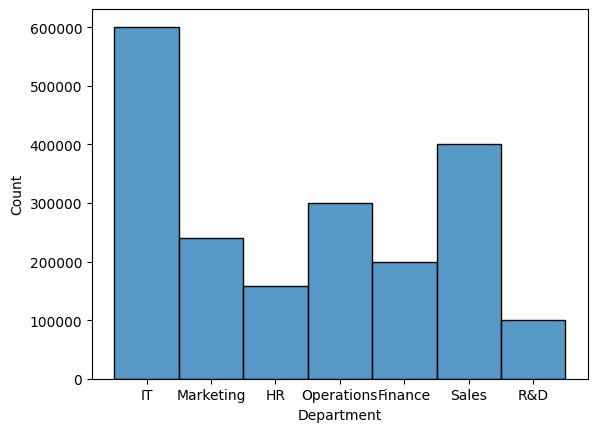

In [7]:
import seaborn as sns
sns.histplot(data=df_salario, x="Department")

Dando segmento na EDA, o grupo optou por executar um conjunto de histogramas para visualizar a distribuição dos dados entre as diferentes features numéricas. É possível observar que a performance está perfeitamente distribuída, enquanto o salário apresenta uma distribuição ruim.

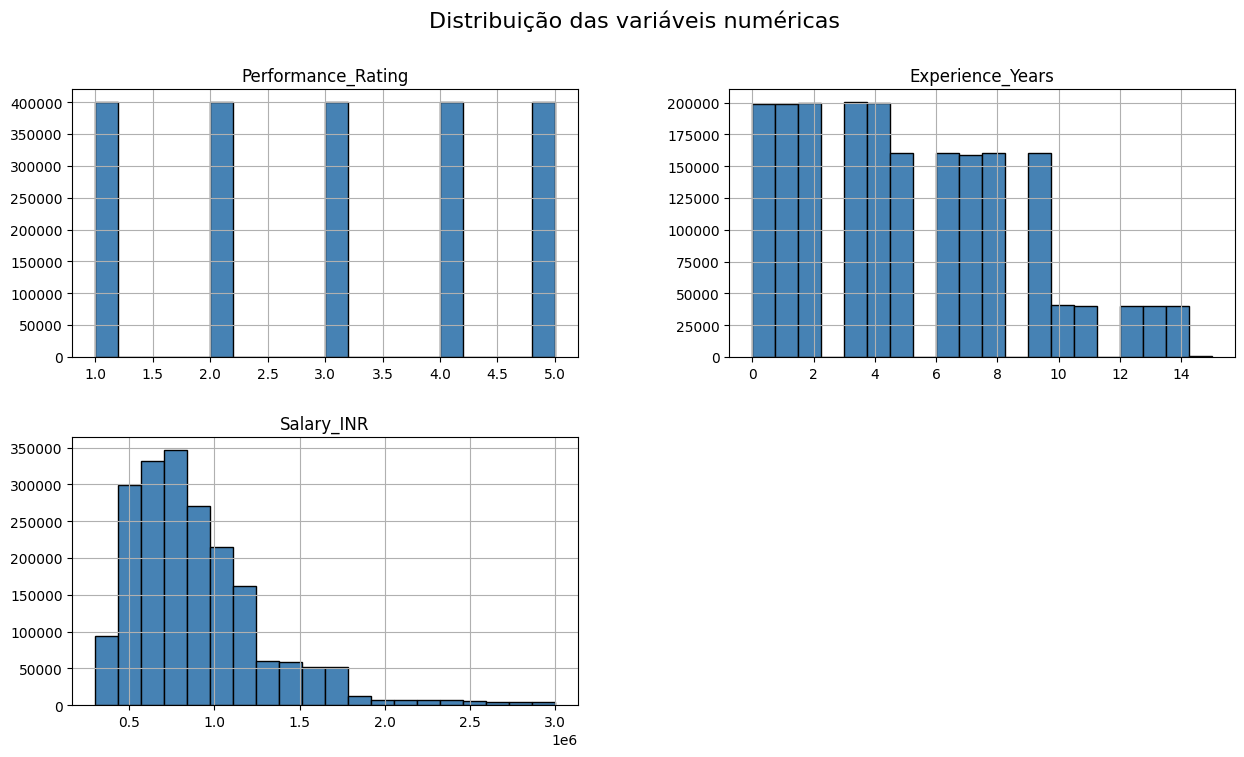

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_salario.hist(bins=20, figsize=(15, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()


Para entender a concentração dos dados mal distribuídos do salário, o grupo optou por realizar um boxplot, de forma a observar o percentual de valores discrepantes.

<Axes: >

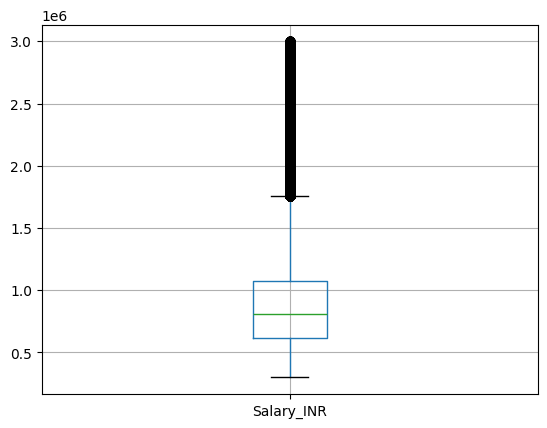

In [9]:
df_salario.boxplot(column='Salary_INR')

Após realização do boxplot, o grupo optou por reduzir o dataframe em 10% pra cima e 10% p baixo, de forma a tentar excluir o excesso de outliers. É possível ver que após a remoção os Outliers não são mais identificados. - *Eu (Leo) acho que 10% é muito, mas considerando a qtd de dados acho reasonable até. Mas quero checar o fabricio.*

<Axes: >

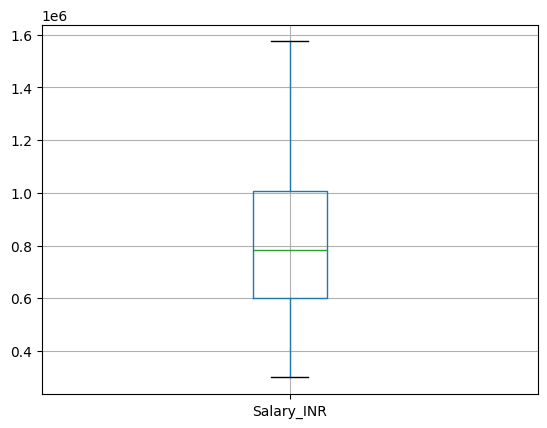

In [10]:
q_alto = 0.93

limite_alto = df_salario['Salary_INR'].quantile(q_alto)

df_podado = df_salario[
    (df_salario['Salary_INR'] <= limite_alto)
]

df_podado.boxplot(column='Salary_INR')

Checar se fazemos algo ou não

<Axes: xlabel='Department', ylabel='Count'>

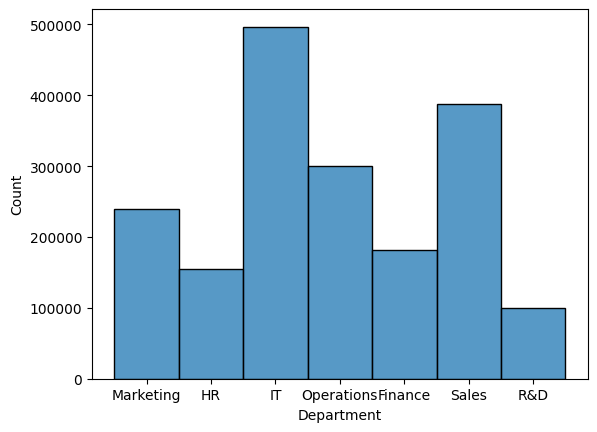

In [11]:
sns.histplot(data=df_podado, x="Department")

In [12]:
df_corr = df_podado.copy()

In [13]:
df_corr['Work_Mode'].unique()

array(['On-site', 'Remote'], dtype=object)

In [14]:
mapeamento_work_mode = {'Remote': 0, 'On-site': 1}
df_corr['WorkMode_Num'] = df_corr['Work_Mode'].map(mapeamento_work_mode)

In [15]:
mapeamento_status = {'Resigned': 0, 'Active': 1, 'Terminated': 2, 'Retired': 3}
df_corr['Status_Num'] = df_corr['Status'].map(mapeamento_status)

In [16]:
df_corr.corr(numeric_only=True).style.background_gradient(cmap= 'Blues')

,Performance_Rating,Experience_Years,Salary_INR,WorkMode_Num,Status_Num
Performance_Rating,1.000000,-0.000222,0.000025,-0.000214,-0.000270
Experience_Years,-0.000222,1.000000,0.000976,-0.000322,0.000565
Salary_INR,0.000025,0.000976,1.000000,-0.000059,-0.001745
WorkMode_Num,-0.000214,-0.000322,-0.000059,1.000000,0.000648
Status_Num,-0.000270,0.000565,-0.001745,0.000648,1.000000


Para complementar a análise de correlação, o grupo realizou um gráfico de disperção com todas as classes do dataset, para tentar observar de forma gráfica onde os valores se encontram e como se correlacionam entre diferentes classes (a linha foi comentada para reduzir o tempo de execução do programa. O resultado está na pasta Salario, arquivo DispersaoSalario.png).

In [17]:
df_splot = df_corr[['Performance_Rating', 'Experience_Years', 'Salary_INR',	'WorkMode_Num',	'Status_Num', 'Department' , 'Location']]
#sns.pairplot(df_splot, hue='Department', height=3.5, diag_kind='hist')

Seguindo com a EDA e com base nos resultados obtidos por meio do gráfico de dispersão, o grupo optou por realizar um histograma e o boxplot para enxergar a dispersão salarial com base nas áreas. É possível perceber que IT e Finance possuem os funcionários com a maior faixa salarial da empresa.

<Axes: xlabel='Salary_INR', ylabel='Count'>

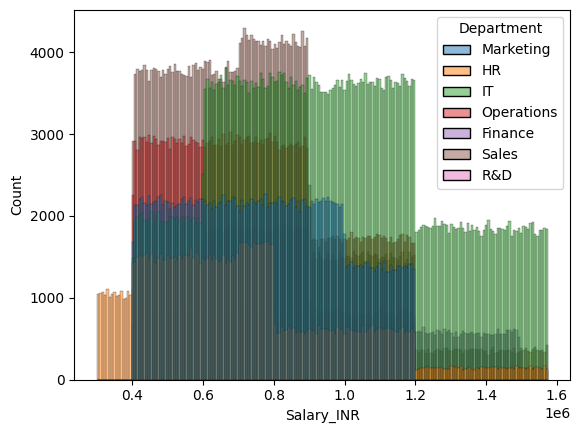

In [18]:
sns.histplot(data=df_splot, x="Salary_INR", hue="Department")

Para obter uma visualização limpa da dispersão salarial em cada área, foi gerado múltiplos histogramas, um para cada departamento.

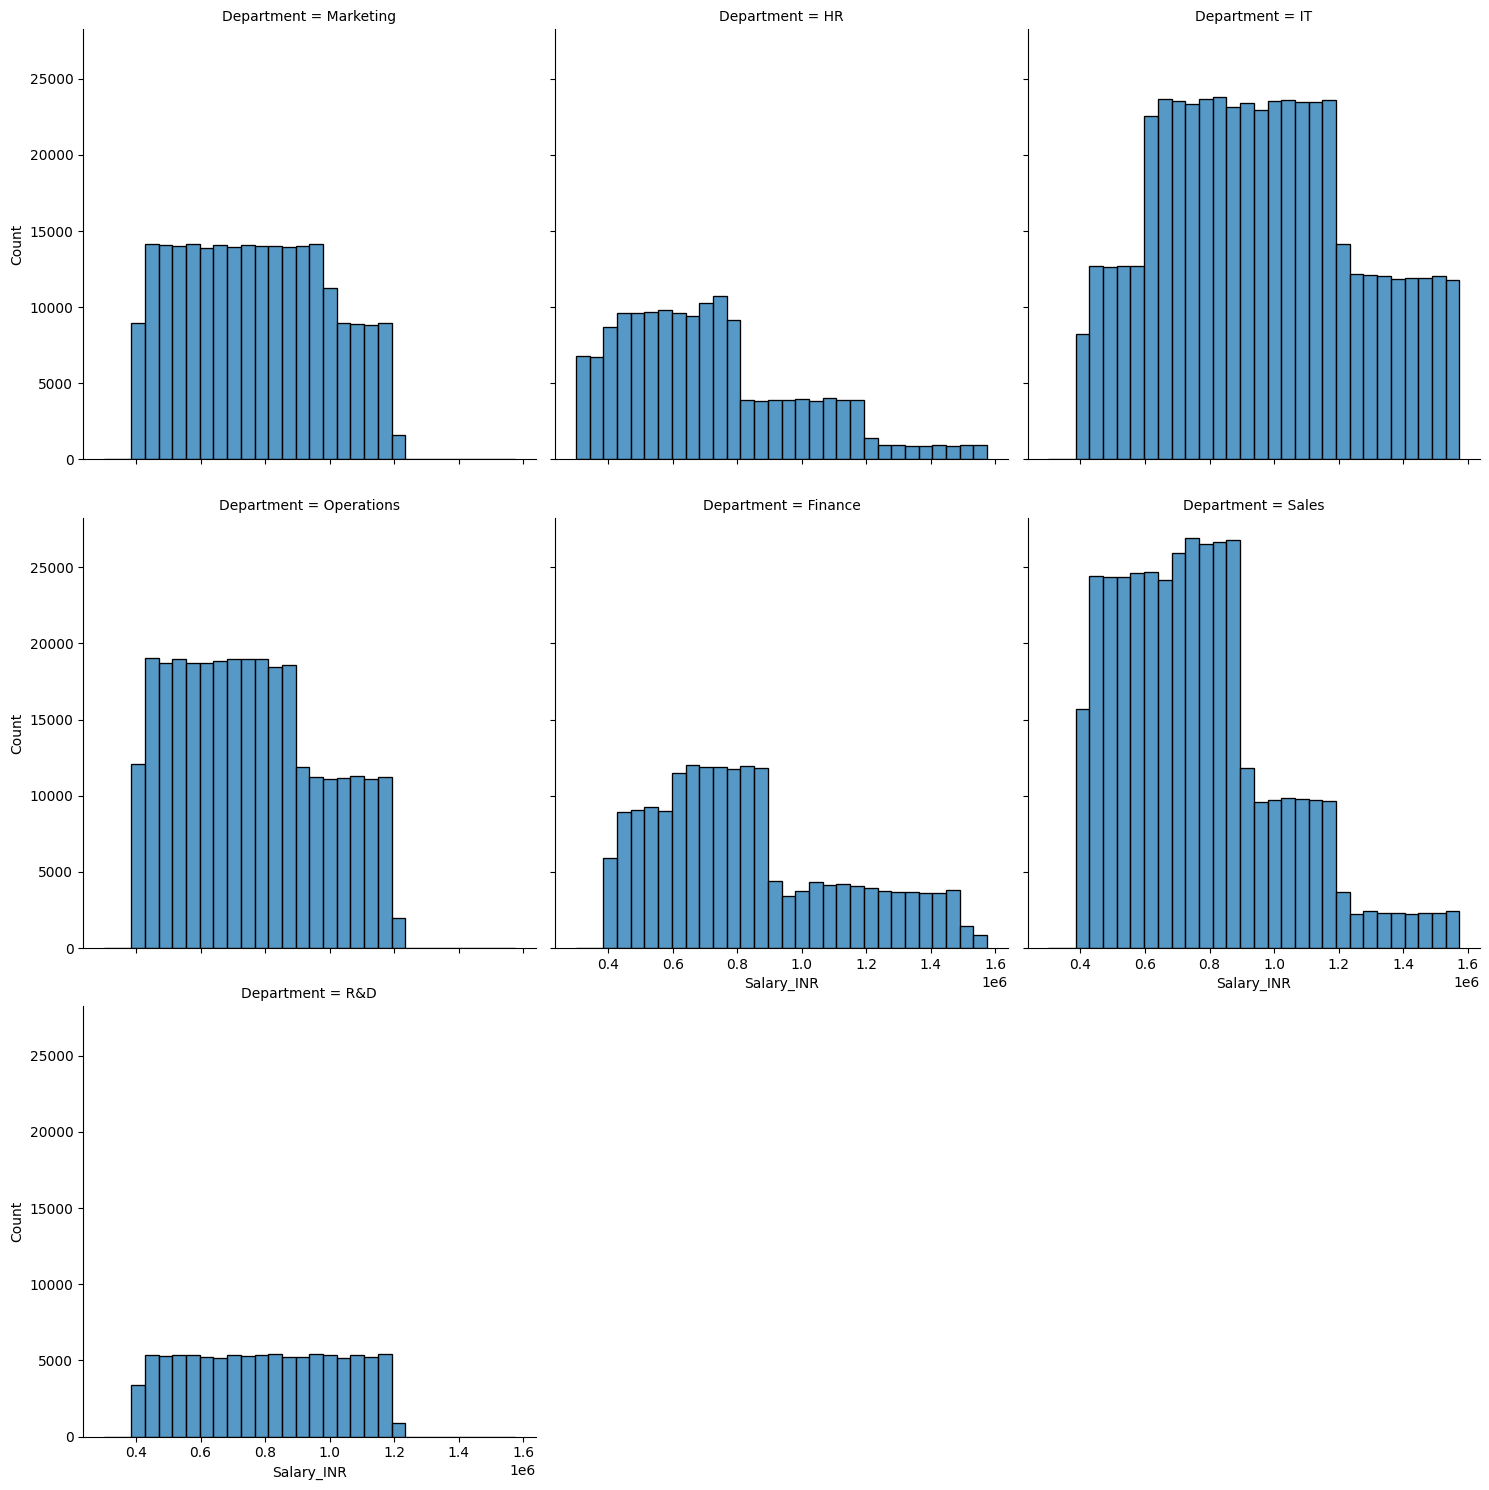

In [19]:
sns.displot(data=df_splot, x="Salary_INR", col="Department", col_wrap=3, kind="hist", bins=30)

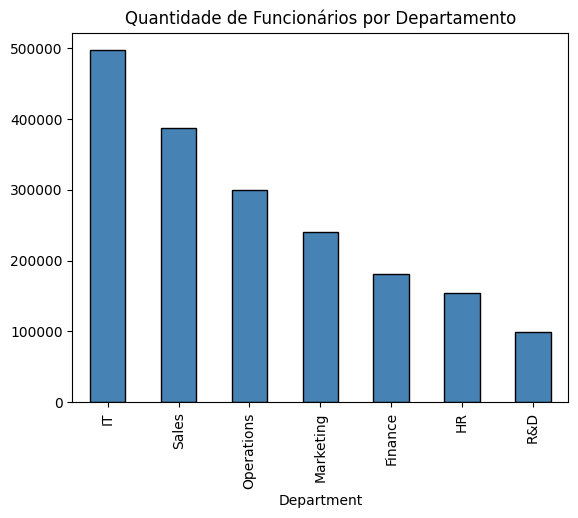

In [20]:
df_podado['Department'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Quantidade de Funcionários por Departamento')
plt.show()

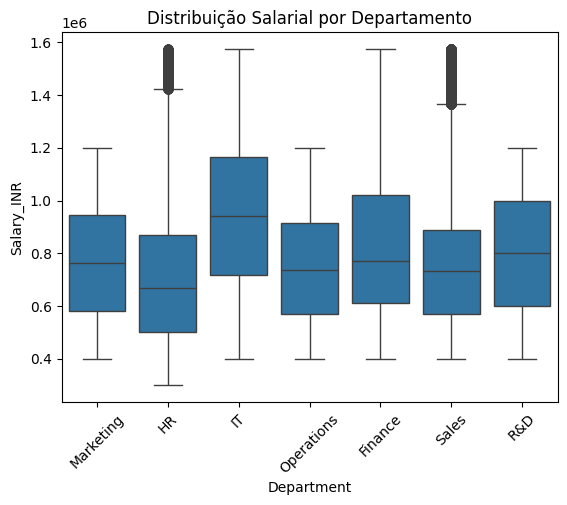

c:\Users\Bruno Malena\Documents\Facens\Reconhecimento de padroes\ProjetoAC2_ReconhecimentoPadr-es\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


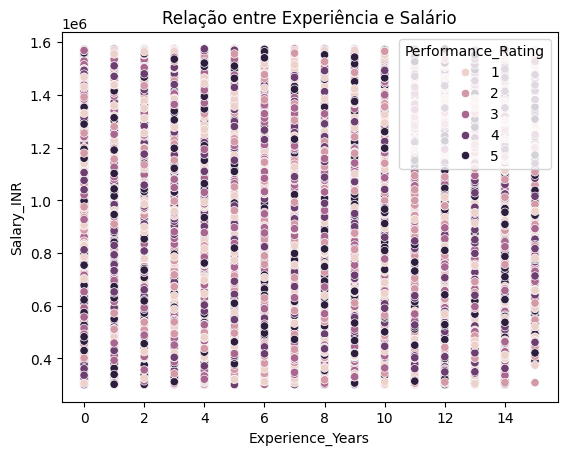

In [21]:
sns.boxplot(x='Department', y='Salary_INR', data=df_podado)
plt.title('Distribuição Salarial por Departamento')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='Experience_Years', y='Salary_INR', hue='Performance_Rating', data=df_podado)
plt.title('Relação entre Experiência e Salário')
plt.show()

## **2. Etapa de Pré-Processamento**

*Removendo colunas irrelevantes e evitando erros durante o processo.*

In [22]:
df_corrigido = df_salario.drop(columns=['Unnamed: 0', 'Employee_ID', 'Full_Name'], errors='ignore')

*Padronizando as datas de contratação e adiciona uma nova coluna que representa há quantos anos cada funcionário está na empresa.*

In [23]:
df_corrigido['Hire_Date'] = pd.to_datetime(df_corrigido['Hire_Date'], errors='coerce')

df_corrigido['Tenure_Years'] = (
    (pd.Timestamp.today() - df_corrigido['Hire_Date'])
    .dt.days.div(365)
)

df_salario['Tenure_Years'] = df_corrigido['Tenure_Years']

*Garantindo que o DataFrame não tenha valores nulos nessas colunas, mantendo a consistência estatística dos dados para futuras análises ou modelagem preditiva.*

In [24]:
df_corrigido = df_corrigido.fillna({
    'Performance_Rating': df_corrigido['Performance_Rating'].median(),
    'Experience_Years': df_corrigido['Experience_Years'].median(),
    'Tenure_Years': df_corrigido['Tenure_Years'].median()
})

*Codificando as variáveis categóricas em formato numérico, permitindo que os algoritmos de machine learning trabalhem com os dados de forma eficiente.*

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['Department', 'Job_Title', 'Location', 'Status', 'Work_Mode']:
    df_corrigido[col] = encoder.fit_transform(df_corrigido[col].astype(str))

*Variáveis preditoras (X) e variável alvo (y)*

In [26]:
X = df_corrigido.drop(columns=['Salary_INR', 'Hire_Date' , 'Employee_ID', 'Location'], errors='ignore')
y = df_corrigido['Salary_INR']

*Realizando a padronização das variáveis numéricas do conjunto de dados, garantindo que todas fiquem na mesma escala antes de treinar o modelo.*

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

*dividindo o conjunto de dados em dados de treino e dados de teste*

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **3. Modelos de Regressão**

*Definindo uma métrica para avaliar o desempenho de modelos de regressão, exibindo três indicadores principais de erro e precisão.*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def avaliar_modelo(nome, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{nome} -> MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

**KNN**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

bins = np.quantile(y_test, [0, 0.33, 0.66, 1.0])
labels = ['Low', 'Medium', 'High']

y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred_knn, bins=bins, labels=labels, include_lowest=True)

cm = pd.crosstab(y_test_cat, y_pred_cat)
accuracy = np.trace(cm.values) / np.sum(cm.values)

mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)

print("===== Avaliação do Modelo KNN =====")
print(f"Acurácia (faixas salariais): {accuracy:.2%}")
print(f"MAE  (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")

===== Avaliação do Modelo KNN =====
Acurácia (faixas salariais): 49.02%
MAE  (Erro Médio Absoluto): 242830.4428
MSE  (Erro Quadrático Médio): 96753759625.6655
RMSE (Raiz do Erro Quadrático Médio): 311052.6637


**Naive Bayes**

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, classification_report

N_CLASSES = 15

discretizer = KBinsDiscretizer(
    n_bins=N_CLASSES,
    encode='ordinal',
    strategy='uniform',
    subsample=None,
    random_state=42
)

y_train_binned = discretizer.fit_transform(y_train.values.reshape(-1, 1)).flatten().astype(int)
y_test_binned = discretizer.transform(y_test.values.reshape(-1, 1)).flatten().astype(int)

nb = GaussianNB()
nb.fit(X_train, y_train_binned)

y_pred_nb_binned = nb.predict(X_test)

acuracia = accuracy_score(y_test_binned, y_pred_nb_binned)
print("===== Avaliação do Modelo Naive Bayes =====")
print(f"Acurácia (faixas salariais): {acuracia:.4f}\n")

bin_edges = discretizer.bin_edges_[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

y_test_cont = np.array([bin_centers[i] for i in y_test_binned])
y_pred_cont = np.array([bin_centers[i] for i in y_pred_nb_binned])

mae = mean_absolute_error(y_test_cont, y_pred_cont)
mse = mean_squared_error(y_test_cont, y_pred_cont)
rmse = np.sqrt(mse)

print("===== Métricas de Erro (baseadas no centro dos bins) =====")
print(f"MAE  (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")

===== Avaliação do Modelo Naive Bayes =====
Acurácia (faixas salariais): 0.2290

===== Métricas de Erro (baseadas no centro dos bins) =====
MAE  (Erro Médio Absoluto): 278570.0238
MSE  (Erro Quadrático Médio): 153963196840.0052
RMSE (Raiz do Erro Quadrático Médio): 392381.4430


**Decision Tree**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

avaliar_modelo("Decision Tree", y_test, y_pred_tree)

bins = np.quantile(y_test, [0, 0.33, 0.66, 1.0])
labels = ['Low', 'Medium', 'High']

y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred_tree, bins=bins, labels=labels, include_lowest=True)

cm = pd.crosstab(y_test_cat, y_pred_cat)
accuracy = np.trace(cm.values) / np.sum(cm.values)

mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)

print("===== Decision Tree =====")
print(f"Acurácia (faixas salariais): {accuracy:.2%}")
print(f"MAE  (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")

Decision Tree -> MAE: 209653.9955 | RMSE: 256600.0415 | R²: 0.5949
===== Decision Tree =====
Acurácia (faixas salariais): 52.02%
MAE  (Erro Médio Absoluto): 209653.9955
MSE  (Erro Quadrático Médio): 65843581311.4414
RMSE (Raiz do Erro Quadrático Médio): 256600.0415


**Regressão Linear**

Regressão Linear -> MAE: 291343.5022 | RMSE: 393635.8782 | R²: 0.0468
===== Regressão Linear =====
Acurácia (faixas salariais): 33.93%
MAE  (Erro Médio Absoluto): 291343.5022
MSE  (Erro Quadrático Médio): 154949204625.7825
RMSE (Raiz do Erro Quadrático Médio): 393635.8782


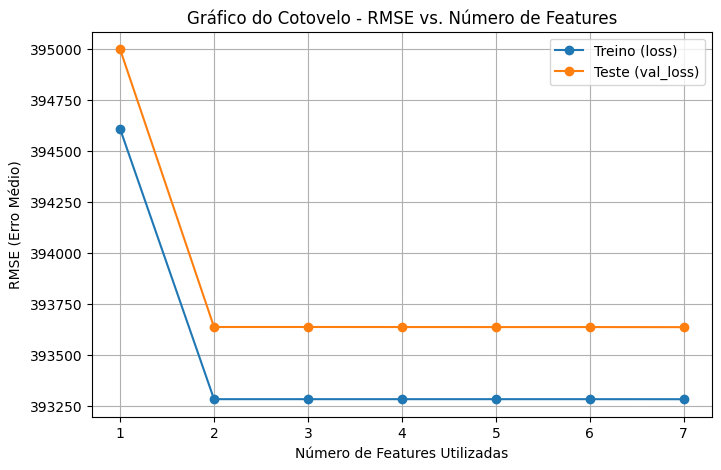

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

avaliar_modelo("Regressão Linear", y_test, y_pred_lr)

bins = np.quantile(y_test, [0, 0.33, 0.66, 1.0])
labels = ['Low', 'Medium', 'High']

y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred_lr, bins=bins, labels=labels, include_lowest=True)

cm = pd.crosstab(y_test_cat, y_pred_cat)
accuracy = np.trace(cm.values) / np.sum(cm.values)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("===== Regressão Linear =====")
print(f"Acurácia (faixas salariais): {accuracy:.2%}")
print(f"MAE  (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")

num_features = X_train.shape[1]
rmse_train = []
rmse_test = []

for i in range(1, num_features + 1):
    X_train_subset = X_train[:, :i]
    X_test_subset = X_test[:, :i]

    lr_temp = LinearRegression()
    lr_temp.fit(X_train_subset, y_train)

    y_pred_train = lr_temp.predict(X_train_subset)
    y_pred_test = lr_temp.predict(X_test_subset)

    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_features + 1), rmse_train, marker='o', label='Treino (loss)')
plt.plot(range(1, num_features + 1), rmse_test, marker='o', label='Teste (val_loss)')
plt.title('Gráfico do Cotovelo - RMSE vs. Número de Features')
plt.xlabel('Número de Features Utilizadas')
plt.ylabel('RMSE (Erro Médio)')
plt.legend()
plt.grid(True)
plt.show()

**Rede Neural**

c:\Users\Bruno Malena\Documents\Facens\Reconhecimento de padroes\ProjetoAC2_ReconhecimentoPadr-es\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


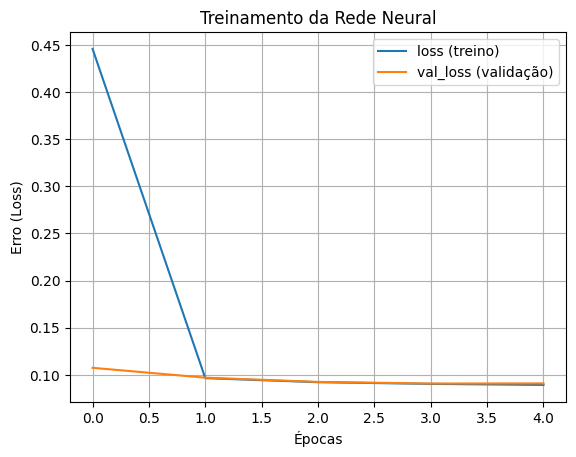

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 5s 421us/step
===== Avaliação do Modelo - Rede Neural (Keras - Log) =====
Acurácia (faixas salariais): 51.41%
MAE  (Erro Médio Absoluto): 216022.2969
MSE  (Erro Quadrático Médio): 71692075008.0000
RMSE (Raiz do Erro Quadrático Médio): 267753.7582


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss (treino)')
    plt.plot(history.history['val_loss'], label='val_loss (validação)')
    plt.xlabel('Épocas')
    plt.ylabel('Erro (Loss)')
    plt.title('Treinamento da Rede Neural')
    plt.legend()
    plt.grid(True)
    plt.show()

keras.utils.set_random_seed(42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear') 
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',   
    metrics=['mean_absolute_error']
)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

history = model.fit(
    X_train, y_train_log,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

plot_loss(history)

y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)

bins = np.quantile(y_test, [0, 0.33, 0.66, 1.0])
labels = ['Low', 'Medium', 'High']

y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True)

cm = pd.crosstab(y_test_cat, y_pred_cat)
accuracy = np.trace(cm.values) / np.sum(cm.values)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("===== Avaliação do Modelo - Rede Neural (Keras - Log) =====")
print(f"Acurácia (faixas salariais): {accuracy:.2%}")
print(f"MAE  (Erro Médio Absoluto): {mae:.4f}")
print(f"MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
